In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [28]:
# Load Dataset
df = pd.read_csv('Building_Permits.csv')
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (198900, 43)
  Permit Number  Permit Type            Permit Type Definition  \
0  201505065519            4                      sign - erect   
1  201604195146            4                      sign - erect   
2  201605278609            3  additions alterations or repairs   
3  201611072166            8            otc alterations permit   
4  201611283529            6                       demolitions   

  Permit Creation Date Block  Lot  Street Number Street Number Suffix  \
0           05/06/2015  0326  023            140                  NaN   
1           04/19/2016  0306  007            440                  NaN   
2           05/27/2016  0595  203           1647                  NaN   
3           11/07/2016  0156  011           1230                  NaN   
4           11/28/2016  0342  001            950                  NaN   

  Street Name Street Suffix  ...  Existing Construction Type  \
0       Ellis            St  ...                         3.0   
1       

C:\Users\MBHS_PC\AppData\Local\Temp\ipykernel_21728\2412768889.py:2: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Building_Permits.csv')


In [33]:
# missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                  

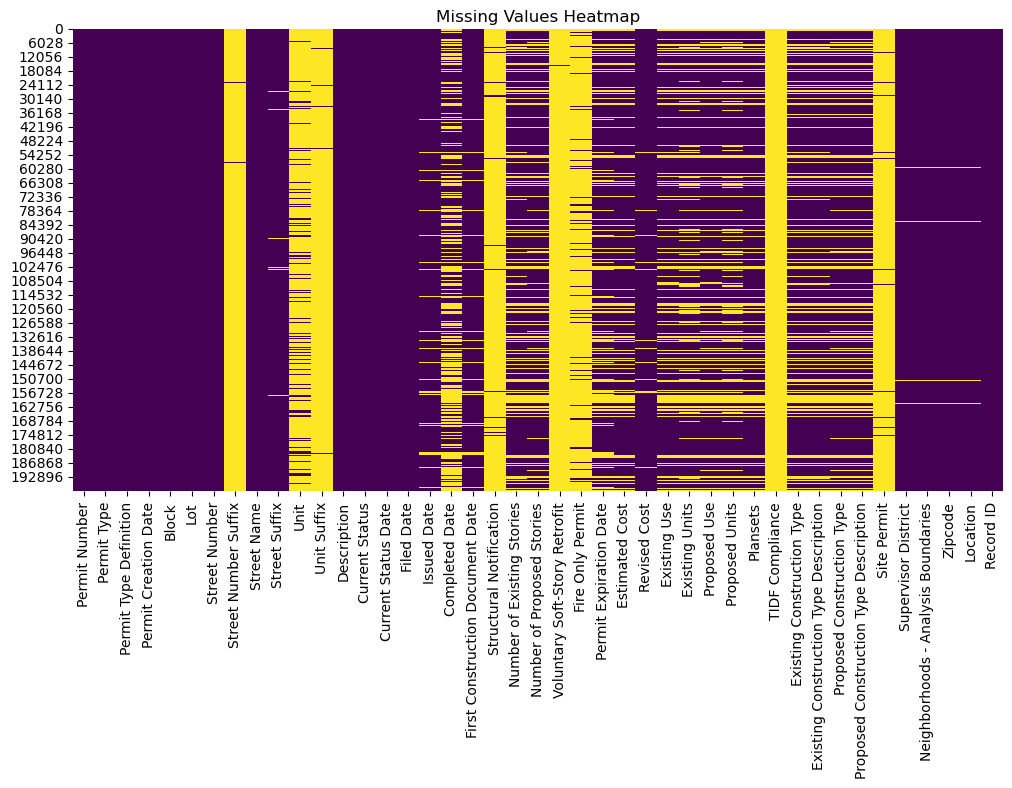

In [34]:
# Visualize missingness
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

## Observation:

Columns like TIDF Compliance, Voluntary Soft-Story Retrofit have >99% missing data.

Columns like Estimated Cost, Proposed Units, Issued Date have partial missing data.

Pattern: Missingness here is mostly MAR (e.g., costs missing when permits are still in draft) and some MCAR (random address suffix absence).

In [52]:
# Select numeric columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_num = df[num_cols]
print("\nNumeric Columns for Imputation:")
print(df_num.head())


Numeric Columns for Imputation:
   Permit Type  Street Number  Unit  Number of Existing Stories  \
0            4            140   NaN                         6.0   
1            4            440   0.0                         7.0   
2            3           1647   NaN                         6.0   
3            8           1230   0.0                         2.0   
4            6            950   NaN                         3.0   

   Number of Proposed Stories  Estimated Cost  Revised Cost  Existing Units  \
0                         NaN          4000.0        4000.0           143.0   
1                         NaN             1.0         500.0             NaN   
2                         6.0         20000.0           NaN            39.0   
3                         2.0          2000.0        2000.0             1.0   
4                         NaN        100000.0      100000.0             NaN   

   Proposed Units  Plansets  Existing Construction Type  \
0             NaN       2.0   

In [53]:
# A. Forward Fill
ffill_df = df_num.fillna(method='ffill')
ffill_missing = ffill_df.isnull().sum()
print("Missing Values After Forward Fill:\n", ffill_missing)

Missing Values After Forward Fill:
 Permit Type                   0
Street Number                 0
Unit                          1
Number of Existing Stories    0
Number of Proposed Stories    2
Estimated Cost                0
Revised Cost                  0
Existing Units                0
Proposed Units                2
Plansets                      0
Existing Construction Type    0
Proposed Construction Type    2
Supervisor District           0
Zipcode                       0
Record ID                     0
dtype: int64


C:\Users\MBHS_PC\AppData\Local\Temp\ipykernel_21728\292890599.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ffill_df = df_num.fillna(method='ffill')


In [54]:
# B. Backward Fill
bfill_df = df_num.fillna(method='bfill')
bfill_df = bfill_df.isnull().sum()
print("Missing Values After Backward Fill:\n", bfill_df)

Missing Values After Backward Fill:


C:\Users\MBHS_PC\AppData\Local\Temp\ipykernel_21728\4098416676.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bfill_df = df_num.fillna(method='bfill')


 Permit Type                    0
Street Number                  0
Unit                          21
Number of Existing Stories     3
Number of Proposed Stories     3
Estimated Cost                 3
Revised Cost                   0
Existing Units                 3
Proposed Units                 3
Plansets                       3
Existing Construction Type     3
Proposed Construction Type     3
Supervisor District           14
Zipcode                       14
Record ID                      0
dtype: int64


In [55]:
# C. Mean Imputation
mean_df = df_num.fillna(df_num.mean())
mean_missing = mean_df.isnull().sum()
print("Missing Values After Mean Imputation:\n", mean_missing)

Missing Values After Mean Imputation:
 Permit Type                   0
Street Number                 0
Unit                          0
Number of Existing Stories    0
Number of Proposed Stories    0
Estimated Cost                0
Revised Cost                  0
Existing Units                0
Proposed Units                0
Plansets                      0
Existing Construction Type    0
Proposed Construction Type    0
Supervisor District           0
Zipcode                       0
Record ID                     0
dtype: int64


In [56]:
# D. Median Imputation
median_df = df_num.fillna(df_num.median())
median_missing = median_df.isnull().sum()
print("Missing Values After Median Imputation:\n", median_missing)

Missing Values After Median Imputation:
 Permit Type                   0
Street Number                 0
Unit                          0
Number of Existing Stories    0
Number of Proposed Stories    0
Estimated Cost                0
Revised Cost                  0
Existing Units                0
Proposed Units                0
Plansets                      0
Existing Construction Type    0
Proposed Construction Type    0
Supervisor District           0
Zipcode                       0
Record ID                     0
dtype: int64


In [58]:
# E. KNN Imputation
knn_imputer = KNNImputer(n_neighbors=30)
knn_df = pd.DataFrame(knn_imputer.fit_transform(df_num), columns=num_cols)

KeyboardInterrupt: 

In [ ]:
knn_missing = knn_df.isnull().sum()
print("Missing Values After Median Imputation:\n", knn_missing)

Missing Values After Median Imputation:
 Permit Type                   0
Street Number                 0
Unit                          0
Number of Existing Stories    0
Number of Proposed Stories    0
Estimated Cost                0
Revised Cost                  0
Existing Units                0
Proposed Units                0
Plansets                      0
Existing Construction Type    0
Proposed Construction Type    0
Supervisor District           0
Zipcode                       0
Record ID                     0
dtype: int64


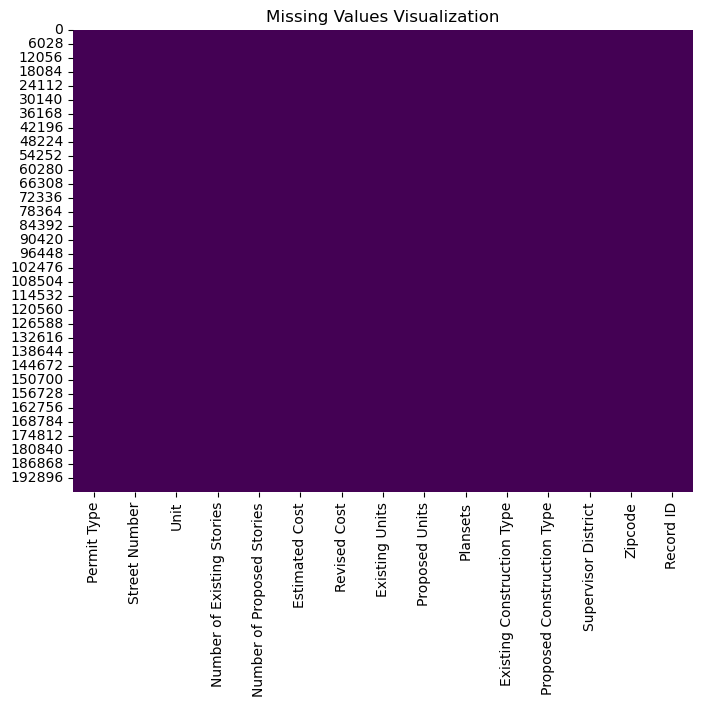

In [ ]:
# Visualize missing values using a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(knn_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Visualization')
plt.show()

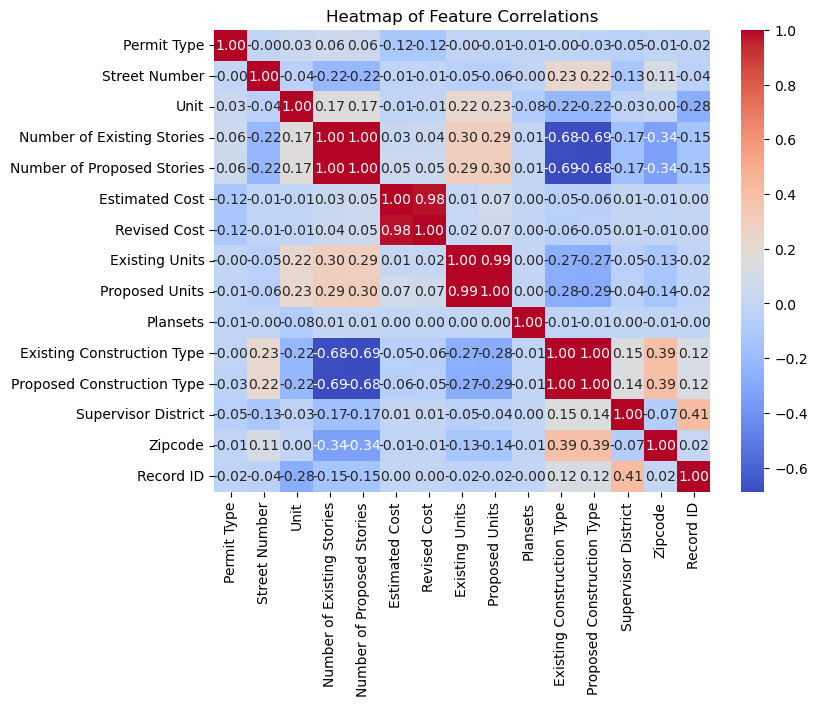

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Feature Correlations")
plt.show()

In [ ]:
def describe_stats(df_input, name):
    stats = df_input.describe().loc[['mean','50%','std']]
    stats.index = ['Mean', 'Median', 'Std Dev']
    stats['Method'] = name
    return stats

stats_list = [
    describe_stats(ffill_df, 'Forward Fill'),
    describe_stats(bfill_df, 'Backward Fill'),
    describe_stats(mean_df, 'Mean Imputation'),
    describe_stats(median_df, 'Median Imputation'),
    describe_stats(knn_df, 'KNN Imputation')
]

stats_comparison = pd.concat(stats_list)
print(stats_comparison)


         Permit Type  Street Number        Unit  Number of Existing Stories  \
Mean        7.522323    1121.728944   79.988839                    5.701340   
Median      8.000000     710.000000    0.000000                    3.000000   
Std Dev     1.457451    1135.768948  324.050747                    8.606735   
Mean             NaN            NaN         NaN                         NaN   
Median           NaN            NaN         NaN                         NaN   
Std Dev          NaN            NaN         NaN                         NaN   
Method           NaN            NaN         NaN                         NaN   
Mean        7.522323    1121.728944   78.517182                    5.705773   
Median      8.000000     710.000000   78.517182                    3.000000   
Std Dev     1.457451    1135.768948  125.879687                    7.631034   
Mean        7.522323    1121.728944   11.637044                    5.123753   
Median      8.000000     710.000000    0.000000     

## Observations

Forward/Backward Fill → Works best for time-series style numeric data but may carry forward bias.

Mean Imputation → Maintains global averages but reduces variance.

Median Imputation → More robust to outliers.

KNN Imputation → Preserves relationships between features and often closest to realistic values but slower on large datasets.